# ДЗ 5.

## Задача 1

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
std = 16
alpha = 0.05
p = 0.95
mean = 80
n = 256

In [2]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)
t1, t2

(-1.9599639845400545, 1.959963984540054)

In [3]:
# Доверительный интервал:
(mean + t1 * std /np.sqrt(n), mean + t2 * std /np.sqrt(n))

(78.04003601545995, 81.95996398454005)

## Задача 2

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190
Известно, что их веса распределены нормально.

Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
Найдите P-значение для данного теста.

In [4]:
mu = 200
alpha = 0.01
n = 10
p = 1 - alpha
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
def statistic(samples):
    return (samples.mean() - mu) / (samples.std(ddof=1) / np.sqrt(n))

In [5]:
std = samples.std(ddof=1)
std

4.453463071962462

In [6]:
mean = samples.mean()
mean

198.5

In [7]:
t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)
t1, t2

(-3.24983554401537, 3.2498355440153697)

In [8]:
# Статистический тест:
t = statistic(samples)
t

-1.0651074037450896

Значение статистики не попало в критическую область, значит нулевая гипотеза принимается


In [9]:
#найдём P-значение
p_left = stats.t.cdf(t, df=n - 1)
p_right = 1 - stats.t.cdf(t, df=n - 1)
pvalue = 2 * min(p_left, p_right)
pvalue

0.31456660352472854

In [10]:
alpha < pvalue

True

In [11]:
#Уровень значимости  𝛼=0.01 . Это меньше, чем получившееся P-значение, поэтому гипотеза принимается

In [12]:
(mean + t1 * std /np.sqrt(n), mean + t2 * std /np.sqrt(n))

(193.92322840036354, 203.07677159963646)

In [13]:
# Гипотеза принимается, т.к. значение попадает в доверительный интервал

## Задача 3

Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

In [14]:
alpha = 0.025
n = 100
d = 4
mean = 17.5
mu = 17

$$H_0 \quad \mu = \mu_0$$ $$H_1 \quad \mu > \mu_0$$ $$Z_H = \frac{\overline{X} - \mu_0}{\sigma} \cdot \sqrt{n}$$ 
Уровень значимости $\alpha = 0.025$ при правосторонней критической области $\Omega_\alpha = (t_{1 - \alpha}, \infty)$,


In [15]:
t = stats.norm.ppf(1 - alpha)
t

1.959963984540054

In [16]:
Zn = (mean - mu) * np.sqrt(n) / np.sqrt(d)
Zn

2.5

Значение попало в критическую область, значит гипотеза H0 отвергается

## Задача 4

Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:

Альтернативная гипотеза двухсторонняя.
Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

In [17]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134, 1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372, 0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ])

In [18]:
alpha = 0.05
variance = 0.0625
n = samples.shape[0]
n

24

In [19]:
sample_variance = samples.var(ddof=1)
print(f'несмещённая оценка дисперсии: {samples.var(ddof=1)}')

несмещённая оценка дисперсии: 0.07804495041666669


H = (n - 1) * sample_variance / variance

In [20]:
def statistic(samples):
    return (n - 1) / (variance / sample_variance)

In [21]:
t1 = stats.chi2.ppf(alpha / 2, df=n - 1)
t2 = stats.chi2.ppf(1 - alpha / 2, df=n - 1)
t1, t2

(11.688551922452438, 38.0756272503558)

Проводим статистический тест. Находим знаяение z-статистики по выборке (наблюдаемое значение)

In [22]:
z = statistic(samples)
z

28.72054175333334

Итак, критическая область:
$$\Omega_\alpha = (-\infty, 11.6885) \cup (38.0756, \infty)$$

Значение статистики не попало в критическую область, значит, гипотеза остаётся в силе.

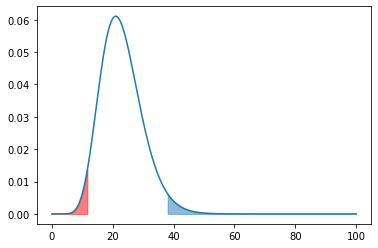

In [24]:
from matplotlib import pyplot as plt

ox = np.linspace(0, 100, 1000)
oy = stats.chi2.pdf(ox, df=n - 1)

ox_left = np.linspace(0, t1, 1000)
oy_left = stats.chi2.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 100, 1000)
oy_right = stats.chi2.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='red')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')